In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Getting the basic understanding of the data


In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

# some of the object will need an encoding before processing to the machine learning modeling
# id column will be dropped because it will not affect anything in our analysis and machine learning process


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

# the average customers vintage (numbers of day been insured in the compant is 154 days)
# no customers in this data set have been with the insurance company for 1 full year
# the oldest customers in this dataset is 85 while the median is 36 
# the most expensive annual premium is almost 17 times more expensive compared to the median annual premium
# this data definitely need a scalling to get a better result in the machine learning process 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include = 'O')

## majority of the health insurance owner is male

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [7]:
## knowing all the unique value in the columns 

df_unique = df.drop(columns = 'id')

for column in df_unique.columns:
    print(f"{column}: ")
    print("")
    print(df_unique[column].unique())
    print("")


Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

## Handling null values, Handling outliers, and encoding process


In [8]:
df.isna().sum()
## apparently there is no null value in all the rows and columns so we dont need to do anything about it for now 


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.drop(columns = 'id', inplace = True)
df.head()

# id wont be needed in the analysis and it wont be needed for the machine learning process so it's kind of redundant to keep it

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


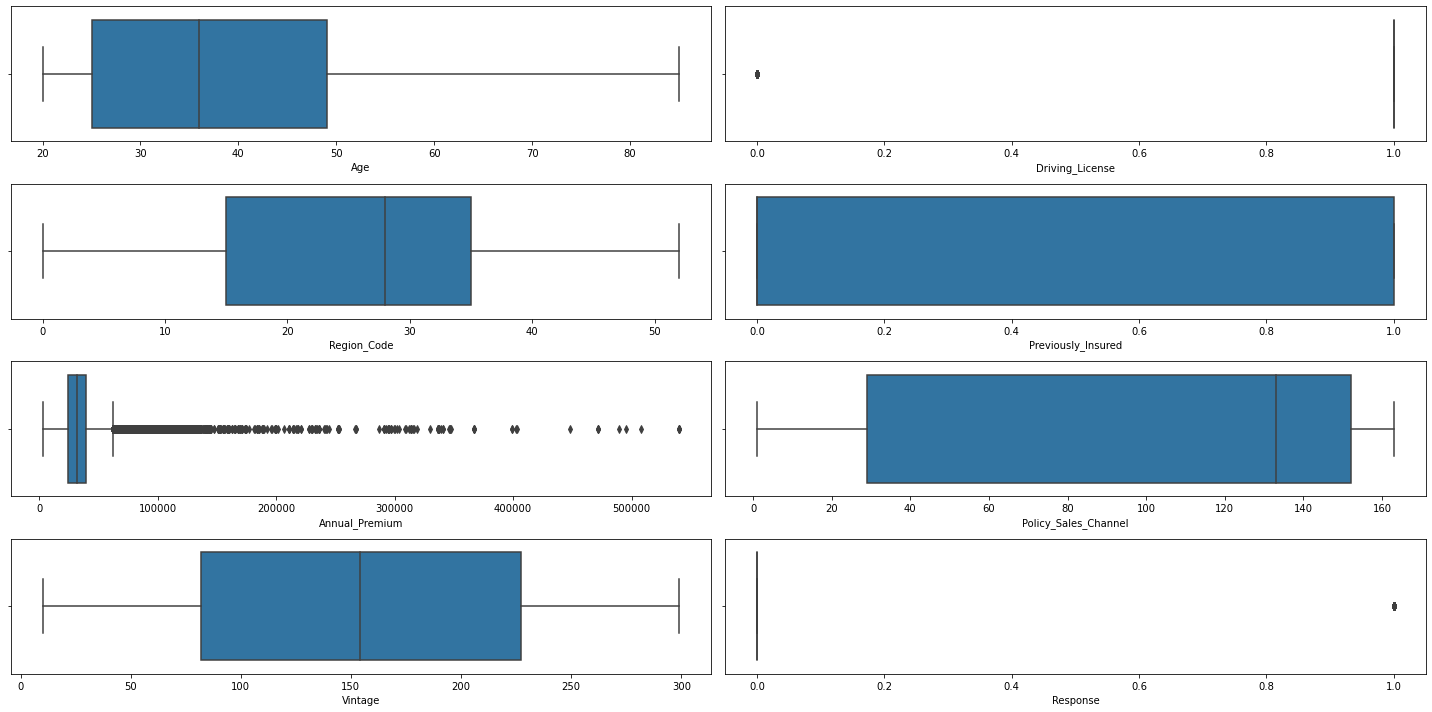

In [10]:
## Looking at the box plot to check all the outliers 

plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(df[column])
    x+=1 

plt.tight_layout()
plt.show()

# fro the boxplot below we can see that there's a lot of outliers in the annual premium
# this will need to be scaled with robust scaler to better the eva matrix / binning


### Encoding Object columns

#### Encoding Gender

In [11]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Encoding Vehicle_Damage

In [12]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


#### Encoding Vehicle_Age

In [13]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [14]:
df.info()

# Now all column are in int or float value and ready to be machine learning processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


## Mini EDA

#### Hypothesis Null

- Gender is Corelated With Response
- Age is Correlated with Response
- Driving License is correlated with respponse
- Previosly_Insured correlated with response
- Vehicle_Age is correlated with response 
- Vehicle Damage is Correlated with response
- Anuual_Premium
- Vintage is Correlated with response


In [15]:
df['Gender'].value_counts()

# there are more male in this dataset compared to female

0    206089
1    175020
Name: Gender, dtype: int64

In [16]:
pd.crosstab(index = df['Gender'], columns = df['Response'], normalize = 'index')

# Dataset contain more male  than female so from perspective according to gender are equal

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


In [17]:
pd.crosstab(index = df['Age'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False)

# 

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


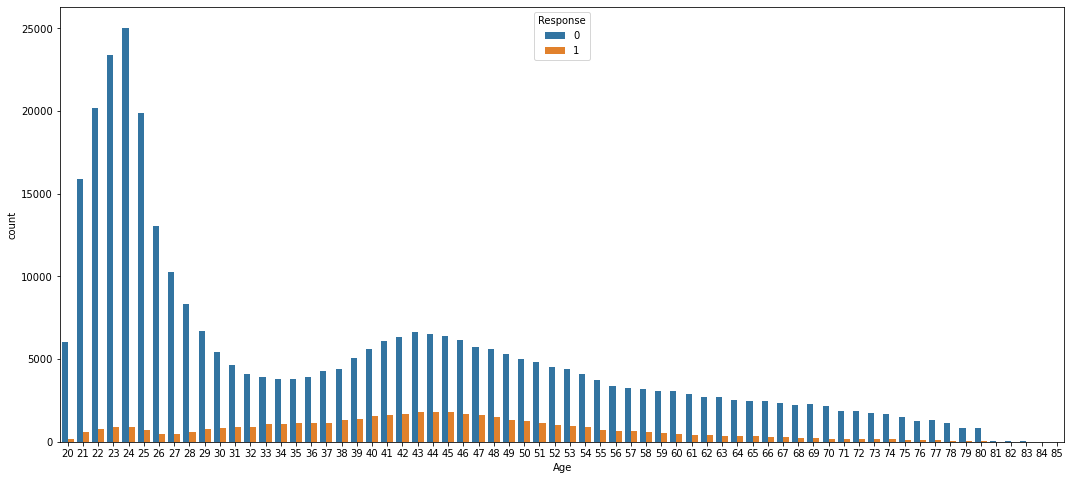

In [18]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

## people ages between from 38 to 50 are more likely to respond
# while people ages between 20 to 30 are less likely to respond

In [19]:
df['Driving_License'].value_counts(normalize= True)
# the number of people who doesn't have a driving license is very small in this dataset

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [20]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')

# Since More most of the people has a driving license, majoriity of the response that say yes are from people who has driving license

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


In [21]:
df['Previously_Insured'].value_counts(normalize = True)

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [22]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')

# people who previously Insured are less likely to response compared to people who was not previously insured

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [108]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')

# 0  = Vehicle age < 1 year
# 1 = Vehicle age 1 - 2 year
# 2 = Vehicle Age > 2 years

# people that has vehicle for more than 2 years are more likely to response 
# people whos has newer vehicle are less likely to response 

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


In [24]:
pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'], normalize = 'index')

# Peeople who has a vehicle damage are more likely to response since they know the concequences
# People who don't have a vehicle Damage Are less likely to response 

Response,0,1
Vehicle_Damage,,
0,0.994796,0.005204
1,0.762345,0.237655


In [25]:
pd.crosstab(index = df['Response'], columns = 'Test', values = df['Annual_Premium'], aggfunc = 'median')


col_0,Test
Response,
0,31504.0
1,33002.0


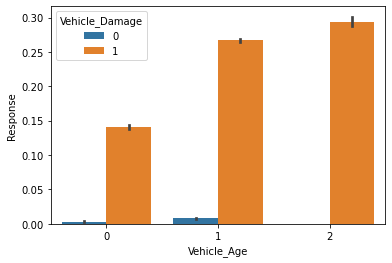

In [113]:
sns.barplot(x = df['Vehicle_Age'], y= df['Response'], hue = df['Vehicle_Damage'])

# Customer who has more than 2 years car age has a more likely to have vehicle damage and more likely to response to vehicle insurance
# Customer who has a vehicle damage are more like to response to Insurance as well

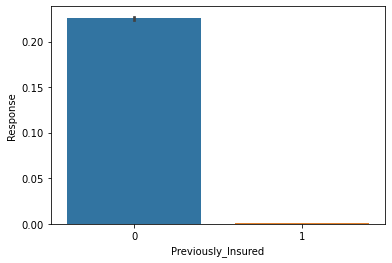

In [114]:
sns.barplot(x = df['Previously_Insured'], y = df['Response'])

# Customer who was not previously insured are more likely to respond  to the vehicle insurance compared to the customer who was previously insured

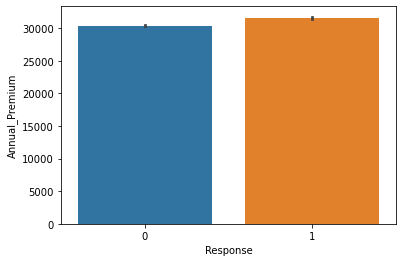

In [26]:
sns.barplot(x = 'Response', y ='Annual_Premium', data = df)

# People who response have slightly higher annual premium 

In [27]:
df['Response'].value_counts(normalize = True)

# This Data is imbalance oversampling is neededm or Smote is required

0    0.877437
1    0.122563
Name: Response, dtype: float64

#### Correlation 

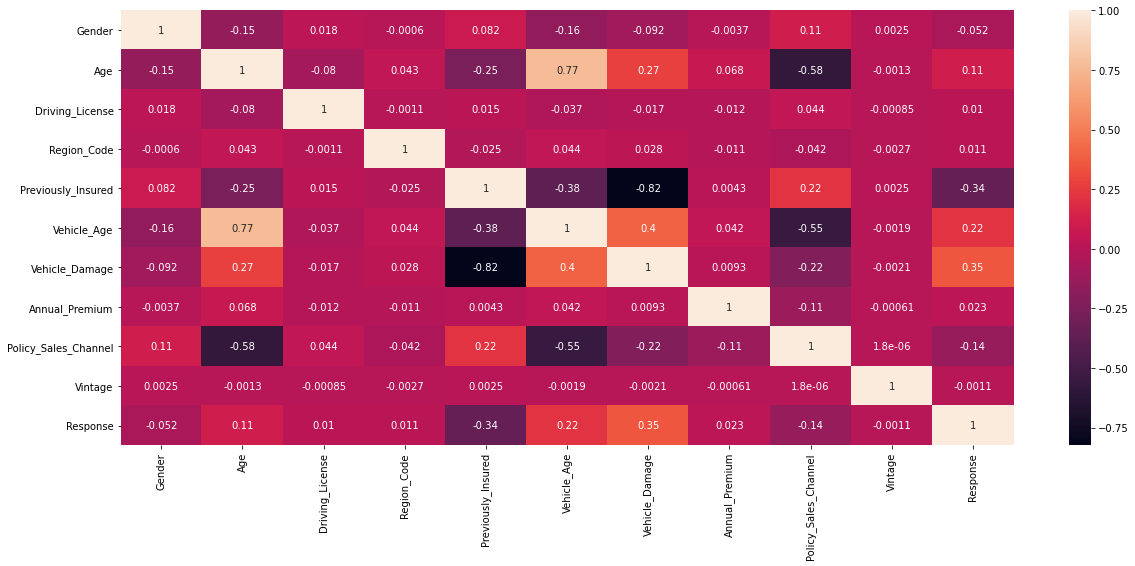

In [28]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

In [29]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

# Sorting Column Correlation 
# Policy Sales Channel

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

#### Feature Engineering and Feature Selection

In [30]:
X = df.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = df['Response']

#### Model Building

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Smote Process Since the data  Imbalance 

In [32]:
import imblearn
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state = 42)

In [34]:
X_train.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
332803,39,0,1,1,52906.0
116248,38,0,1,1,23038.0
255005,22,1,0,0,45318.0
317474,23,1,0,0,29132.0
344212,56,0,2,1,2630.0


In [35]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [36]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [37]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)

In [38]:
df_smote['Response'].value_counts()

# Now the model is balanced we can proceed with model building

1    267700
0    267700
Name: Response, dtype: int64

#### Logistic Regression Model Building

In [39]:
modelSMOTE = LogisticRegression()

In [40]:
modelSMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [41]:
y_pred_SMOTE_logreg = modelSMOTE.predict(X_test)

In [42]:
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)
print(classification_report(y_test, y_pred_SMOTE_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [43]:
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels = [1,0])

In [44]:
df_smote_logreg = pd.DataFrame(data = cm_smote_log_reg , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_smote_logreg

,Prediksi 1,Prediksi 0
Aktual 1,9194,329
Aktual 0,26521,40178


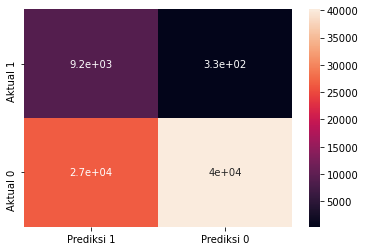

In [115]:
sns.heatmap(df_smote_logreg, annot = True)

## Logistic Regression base model has  False Negative amount of 329

# Error Type Interpretation on This Dataset:
  # False Negative -- Actually Interested in Vehicle Insurance, However the model predicted that they're not interested
  # False Positive -- Actually not Interested in Vehicle Insurance, However the model predicted that they're interested 

#### KNN Classifier

In [46]:
modelSMOTE_KNN = KNeighborsClassifier()

In [47]:
modelSMOTE_KNN.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [48]:
y_pred_SMOTE_KNN = modelSMOTE_KNN.predict(X_test)

In [49]:
acc_KNN = accuracy_score(y_test, y_pred_SMOTE_KNN)
recall_KNN = recall_score(y_test, y_pred_SMOTE_KNN)
prec_KNN = precision_score(y_test, y_pred_SMOTE_KNN)
f1_KNN = f1_score(y_test, y_pred_SMOTE_KNN)
print(classification_report(y_test, y_pred_SMOTE_KNN))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     66699
           1       0.20      0.46      0.28      9523

    accuracy                           0.71     76222
   macro avg       0.55      0.60      0.55     76222
weighted avg       0.82      0.71      0.75     76222



In [50]:
cm_smote_KNN = confusion_matrix(y_test, y_pred_SMOTE_KNN, labels = [1,0])

In [51]:
df_smote_KNN = pd.DataFrame(data = cm_smote_KNN , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_smote_KNN

## KNN base model has  False Negative amount of 5174

# KNN model has more False Negative means this model doesn't perform well in this task 

,Prediksi 1,Prediksi 0
Aktual 1,4349,5174
Aktual 0,17150,49549


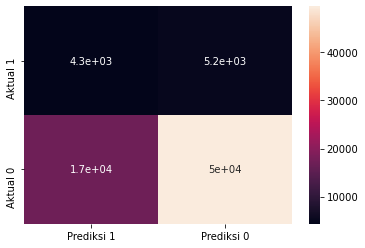

In [52]:
sns.heatmap(df_smote_KNN, annot = True)

#### Decision Tree 

In [53]:
modelSMOTEDT = DecisionTreeClassifier()

In [54]:
modelSMOTEDT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [55]:
y_pred_SMOTE_DT = modelSMOTEDT.predict(X_test)

In [56]:
acc_DT = accuracy_score(y_test,y_pred_SMOTE_DT)
prec_DT = precision_score(y_test, y_pred_SMOTE_DT)
rec_DT = recall_score(y_test, y_pred_SMOTE_DT)
f1_DT = f1_score(y_test, y_pred_SMOTE_DT)

print(classification_report(y_test, y_pred_SMOTE_DT))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66699
           1       0.28      0.58      0.37      9523

    accuracy                           0.76     76222
   macro avg       0.60      0.68      0.61     76222
weighted avg       0.85      0.76      0.79     76222



In [57]:
cm_DT = confusion_matrix(y_test, y_pred_SMOTE_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,5518,4005
Aktual 0,14530,52169


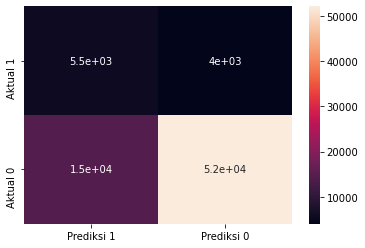

In [58]:
sns.heatmap(df_DT, annot = True)

## Decision Tree Classifier base model has  False Negative amount of 4005

#### Random Forest Classifier

In [59]:
modelSMOTERF = RandomForestClassifier()

In [60]:
modelSMOTERF.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [61]:
y_pred_SMOTE_RF = modelSMOTERF.predict(X_test)

In [62]:
acc_RF = accuracy_score(y_test,y_pred_SMOTE_RF)
prec_RF = precision_score(y_test, y_pred_SMOTE_RF)
rec_RF = recall_score(y_test, y_pred_SMOTE_RF)
f1_RF = f1_score(y_test, y_pred_SMOTE_RF)

print(classification_report(y_test, y_pred_SMOTE_RF))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     66699
           1       0.28      0.63      0.38      9523

    accuracy                           0.75     76222
   macro avg       0.61      0.70      0.61     76222
weighted avg       0.85      0.75      0.78     76222



In [63]:
cm_RF = confusion_matrix(y_test, y_pred_SMOTE_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_RF

,Prediksi 1,Prediksi 0
Aktual 1,6043,3480
Aktual 0,15836,50863


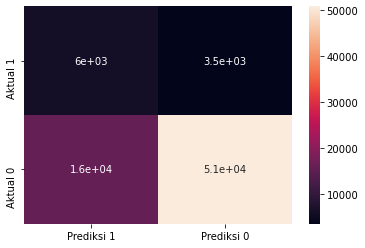

In [64]:
sns.heatmap(df_RF, annot = True)

## Random Forest Classifier base model has  False Negative amount of 3480

In [65]:
eva_met = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg],
    "KNN": [acc_KNN, prec_KNN, recall_KNN, f1_KNN],
    "DecisionTree": [acc_DT, prec_DT, rec_DT, f1_DT],
    "RandomForest" : [acc_RF, prec_RF, rec_RF, f1_RF]
    }

eva = pd.DataFrame(data = eva_met, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

# From this Evaluation MAtrix it shows that logistic Regression has the best Recall Score for the base model

,LogisticReg,KNN,DecisionTree,RandomForest
Accuracy,0.647739,0.707119,0.756829,0.746582
Precision,0.257427,0.202288,0.275239,0.276201
Recall,0.965452,0.456684,0.579439,0.634569
F1-Score,0.406472,0.280382,0.373203,0.384880


### HyperParameter Tuning

#### Logistic Regression

In [66]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

In [67]:
model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [68]:
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.4s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [69]:
logreg_tuned = model_logreg_tuned.best_estimator_

In [70]:
y_tuned_logreg = logreg_tuned.predict(X_test)

In [71]:
cm_logreg_tuned = confusion_matrix(y_test, y_tuned_logreg, labels = [1,0])
cm_logreg_tuned

array([[ 9194,   329],
       [26523, 40176]], dtype=int64)

In [72]:
acc_logreg_tuned = accuracy_score(y_test, y_tuned_logreg)
prec_logreg_tuned = precision_score(y_test, y_tuned_logreg)
rec_logreg_tuned = recall_score(y_test, y_tuned_logreg)
f1_logreg_tuned = f1_score(y_test,y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [73]:
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_logreg_tuned

,Prediksi 1,Prediksi 0
Aktual 1,9194,329
Aktual 0,26523,40176


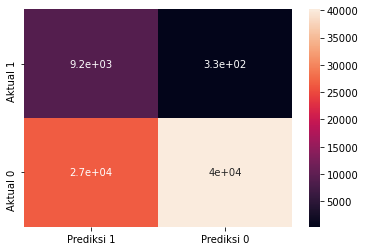

In [74]:
sns.heatmap(df_logreg_tuned, annot = True)

# Logreg Recall score doesn't change after hyper parameter tuning
# Logistic regression base model and tuned model has the same recall score 

#### KNN Tuning

In [75]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9],
               'weights':['uniform','distance'],
               'p':[2, 1]}

In [76]:
model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid = param_KNN, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [77]:
model_KNN_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  7.8min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [78]:
KNN_tuned = model_KNN_tuned.best_estimator_

In [79]:
y_tuned_KNN = KNN_tuned.predict(X_test)

In [80]:
cm_KNN_tuned = confusion_matrix(y_test, y_tuned_KNN, labels = [1,0])
cm_KNN_tuned

array([[ 4517,  5006],
       [15184, 51515]], dtype=int64)

In [81]:
acc_KNN_tuned = accuracy_score(y_test, y_tuned_KNN)
prec_KNN_tuned = precision_score(y_test, y_tuned_KNN)
rec_KNN_tuned = recall_score(y_test, y_tuned_KNN)
f1_KNN_tuned = f1_score(y_test,y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     66699
           1       0.23      0.47      0.31      9523

    accuracy                           0.74     76222
   macro avg       0.57      0.62      0.57     76222
weighted avg       0.83      0.74      0.77     76222



In [82]:
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_KNN_tuned

# False Negative Goes down after hyperparameter Tuning for KNN
# Recall Score goes up by 0.01 Percent

,Prediksi 1,Prediksi 0
Aktual 1,4517,5006
Aktual 0,15184,51515


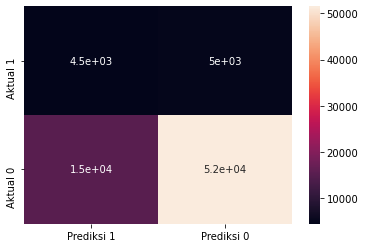

In [83]:
sns.heatmap(df_KNN_tuned, annot = True)

#### Decision Tree Classifier Tuning

In [84]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [85]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [86]:
model_DT_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.8min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='recall', verbose=1)

In [87]:
DT_tuned = model_DT_tuned.best_estimator_

In [88]:
y_tuned_DT = DT_tuned.predict(X_test)

In [89]:
cm_DT_tuned = confusion_matrix(y_test, y_tuned_DT, labels = [1,0])
cm_DT_tuned

array([[ 8388,  1135],
       [38127, 28572]], dtype=int64)

In [90]:
acc_DT_tuned = accuracy_score(y_test, y_tuned_DT)
prec_DT_tuned = precision_score(y_test, y_tuned_DT)
rec_DT_tuned = recall_score(y_test, y_tuned_DT)
f1_DT_tuned = f1_score(y_test,y_tuned_DT)

print(classification_report(y_test, y_tuned_DT))

              precision    recall  f1-score   support

           0       0.96      0.43      0.59     66699
           1       0.18      0.88      0.30      9523

    accuracy                           0.48     76222
   macro avg       0.57      0.65      0.45     76222
weighted avg       0.86      0.48      0.56     76222



In [91]:
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT_tuned

,Prediksi 1,Prediksi 0
Aktual 1,8388,1135
Aktual 0,38127,28572


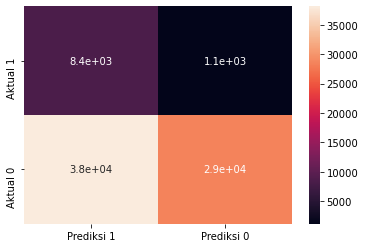

In [92]:
sns.heatmap(df_DT_tuned, annot = True)

# Recall 1 goes up high with this model however False Positve goes up as well
# Recall Score Goes up by 0.3 after Hyper Param Tuning

In [93]:
RF_tuning = RandomForestClassifier()
param_DT =  {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']}

In [94]:
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_DT,scoring = 'recall', verbose = 1, n_jobs = -1,cv = 3)

In [95]:
model_RF_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 0.06, 3, 5],
                                        'min_samples_split': [2, 9, 15, 25],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='recall', verbose=1)

In [98]:
RF_tuned = model_RF_tuned.best_estimator_

model_RF_tuned.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=0.06,
                       min_samples_split=25)

In [100]:
y_tuned_RF = RF_tuned.predict(X_test)

In [101]:
cm_RF_tuned = confusion_matrix(y_test, y_tuned_RF, labels = [1,0])
cm_RF_tuned

array([[ 8631,   892],
       [21427, 45272]], dtype=int64)

In [102]:
acc_RF_tuned = accuracy_score(y_test, y_tuned_RF)
prec_RF_tuned = precision_score(y_test, y_tuned_RF)
rec_RF_tuned = recall_score(y_test, y_tuned_RF)
f1_RF_tuned = f1_score(y_test,y_tuned_RF)

print(classification_report(y_test, y_tuned_RF))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66699
           1       0.29      0.91      0.44      9523

    accuracy                           0.71     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.71      0.76     76222



In [103]:
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_RF_tuned

,Prediksi 1,Prediksi 0
Aktual 1,8631,892
Aktual 0,21427,45272


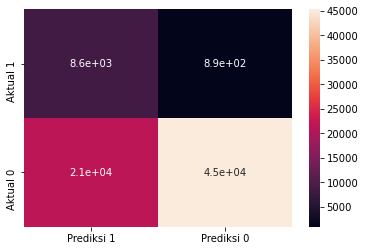

In [105]:
sns.heatmap(df_RF_tuned, annot = True)

### Random Forest Classifier Recall Score goes up after hyper parameter tuning 
# Recall score goes up by 27 %

In [106]:
eva_mat_tuned = {
    "LogisticReg": [acc_logreg_tuned, prec_logreg_tuned, rec_logreg_tuned, f1_logreg_tuned],
    "KNN": [acc_KNN_tuned, prec_KNN_tuned, rec_KNN_tuned, f1_KNN_tuned],
    "DecisionTree": [acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    "RandomForest" : [acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,KNN,DecisionTree,RandomForest
Accuracy,0.647713,0.735116,0.484899,0.707184
Precision,0.257412,0.229278,0.180329,0.287145
Recall,0.965452,0.474325,0.880815,0.906332
F1-Score,0.406454,0.309129,0.299368,0.436118
